# Introduction
The following notebook performs an analysis of the Stackoverflow survey results from [2017](https://insights.stackoverflow.com/survey). The analysis is performed based on the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is divided in the following five steps:
* Business Understanding
* Data Understanding
* Prepare Data
* Data Modeling
* Evaluate the Results

The three questions to be answered with this method are:
1. What are the most popular programming languages in different countries?
2. What is the correlation between programming language, experience and salary?
3. What is the most popular occupation for the respondents?

Each question will be guided through this steps.

# Environment setup and metadata extraction
The following cells are dedicated to reading the data, importing the necessary packages and showing a sample of the available information.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

%matplotlib inline

In [2]:
#Load the csv data
results_schema = pd.read_csv("survey_results_schema.csv")
results_public = pd.read_csv("survey_results_public.csv")

In [3]:
print("Total number of questions in survey: {}".format(len(results_schema)))
print("Total number of respondents: {}".format(len(results_public)))
print("Sample of the results schema: ")
display(results_schema.head(n=5))
print("Sample of the results public: ")
display(results_public.head(n=5))

Total number of questions in survey: 154
Total number of respondents: 51392
Sample of the results schema: 


,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Sample of the results public: 


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 1: What are the most popular programming languages in different countries?

## Business Understanding
An important insight for anyone interested in the software industry is knowing the current trends. Knowing which programming languages are the most popular is a useful piece for information for individuals who wish to keep up to date with the lateste technology and as well as for companies who wish to release products, develop technology or hire people.



## Data Understanding 
The dataframe from the survey results contains a column containing the information regarding the programming language the respondents have worked with. We may filter the dataframe by this colum and prepare the data.

## Prepare Data
We can use as baseline the *results_public* dataframe loaded in the environment setup and metadata extraction step. This data frame, contains the unfiltered information of the survey. After that, we may foilter the rows in the data frame based on the value of the *Country* column to generate three country specific dataframes.

In [4]:
is_in_germany = results_public['Country'] == 'Germany'
is_in_uk = results_public['Country'] == 'United Kingdom'
is_in_usa = results_public['Country'] == 'United States'

results_public_germany = results_public[is_in_germany]
results_public_uk = results_public[is_in_uk]
results_public_usa = results_public[is_in_usa]

print("Number of respondents in Germany: " + str(len(results_public_germany)))
print("Number of respondents in United Kingdom: " + str(len(results_public_uk)))
print("Number of respondents in United States: " + str(len(results_public_usa)))

Number of respondents in Germany: 4143
Number of respondents in United Kingdom: 4395
Number of respondents in United States: 11455


## Data Modeling

In [5]:
def create_langauage_chart(country, results_public_country):
    """Create a language chart for a specific country from an input data frame"""
    font_size = 20
    plt.figure(figsize=(16,7))
    plt.ylabel('Number of respondents', fontsize=font_size)
    plt.title('Most popular programming languages in ' + country, fontsize=font_size)
    worked_language = results_public_country['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()
    worked_language.plot(kind="bar", fontsize=font_size)
    plt.savefig('resources/language_chart_' + country.replace(' ', '_') + '.png', bbox_inches='tight')

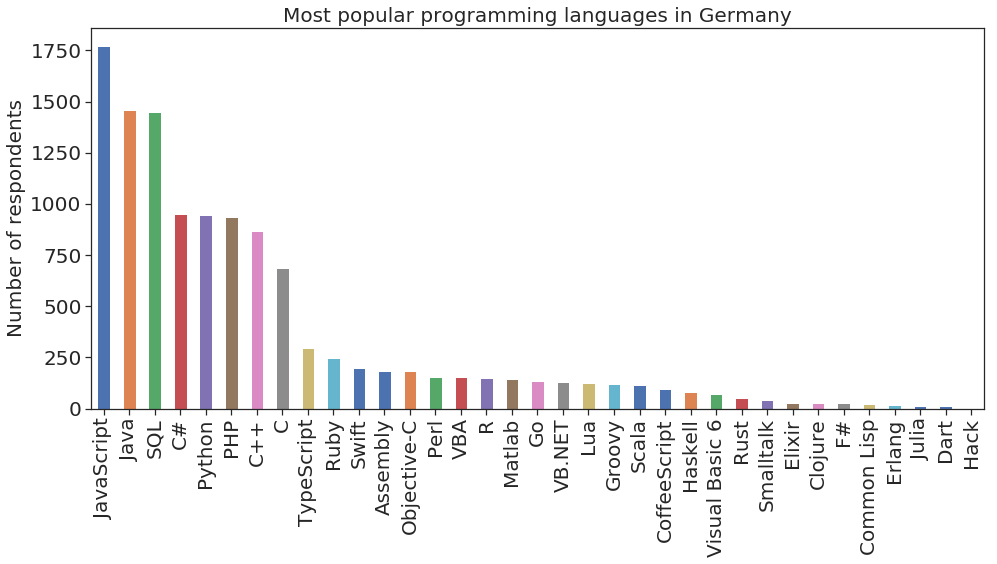

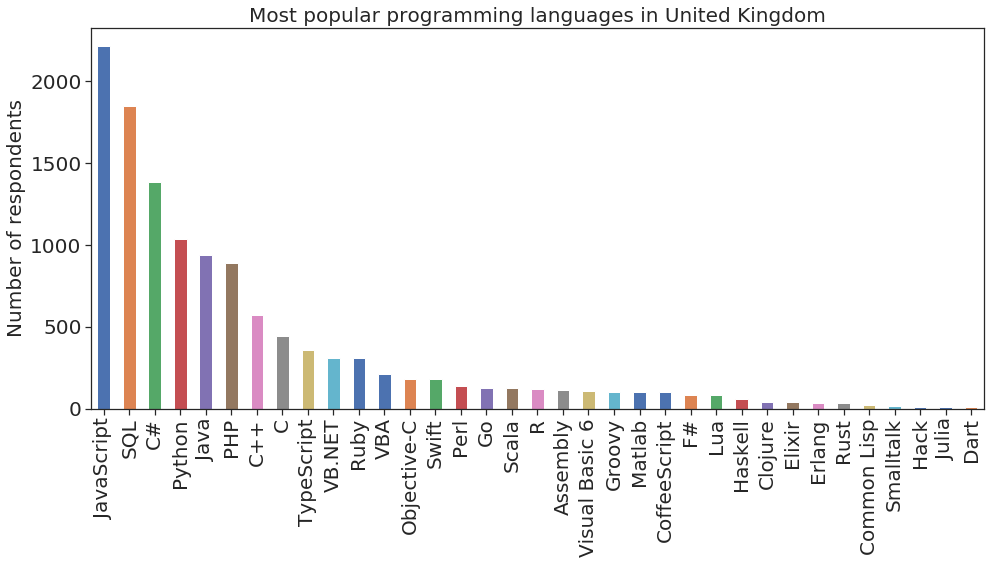

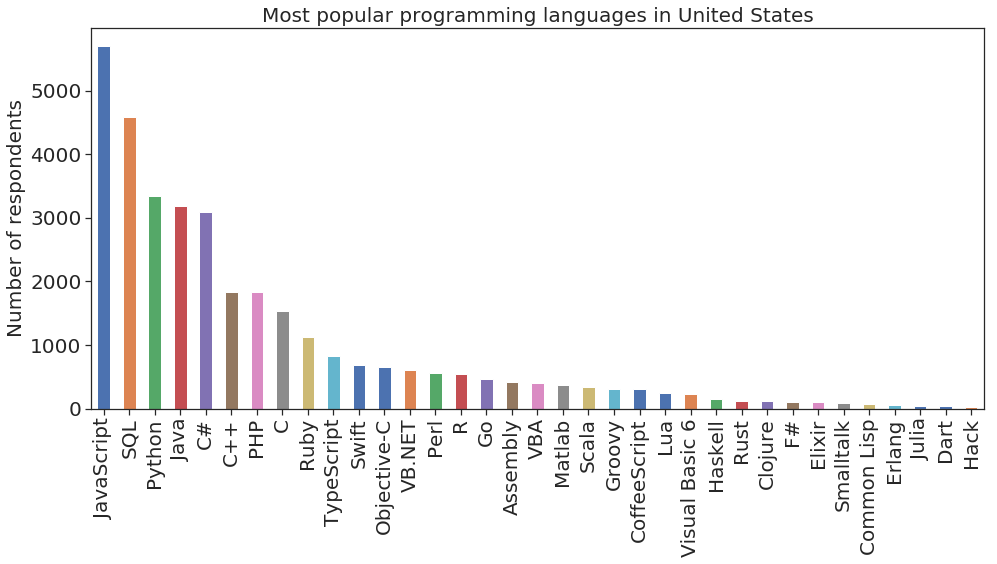

In [6]:
create_langauage_chart('Germany', results_public_germany)
create_langauage_chart('United Kingdom', results_public_uk)
create_langauage_chart('United States', results_public_usa)

## Evaluate the Results
There seems to be a global boom in jobs requiring to develop code with JavaScript. An interesting observation is the increase in the number of respondents in the United States. The most popular programming language, JavaScript, has more than 5000 thousand mentions. That is more mentinos than those for JavaScript in Germany and the United Kingdom combined. This makes sense considering that Stackoverflow is a english speaking website and that the United States is the hub for software development.

We can observe that the 3 countries have a similar trend regarding the most popular programming languages. Javascript is unquestionably the most used language. If we analyze the top 6 most popular languages, we realize that the three countires have the same at the top. However, we can see a variation in the order in which these languages appear. For instance, SQL ranks third in Germany while it it is second in both the United States and the United Kingdom. Based on these results, it is reasonable to assume that trends in popular programming languages are global.

# Question 2: What is the correlation between programming language, experience and salary?

## Business Understanding
People working in the software industry are interested in their career development. For this reason, it is interesting to know which factors make an influence in one's salary. As a point of investigation, we analyze the relationship between programming language, experience and salary. For this question it is relevant to use popular programming languages, therefore, JavaScript, Java, SQL, Python, PHP and C# will be considered.

## Data Understanding
The survey results dataframe contains a column regarding the years of experrience coding and a column for the salary declared by the respondents. We can combie these two pieces of infromatino with the method of filtering the dataframe by programming language from question 1.

## Prepare Data
We can start the preparatino of the results of this question by defining a general functino in which we insert a list of languages and it will show a graph in which the salary will be plotted across the years of experience for each language in the list.

In [7]:
def create_salary_chart_for_language(language_list, results_dataframe):
    """Create a salary over time chart for programming languages specified in a list"""
    font_size = 20
    fig, ax = plt.subplots(figsize=(16,7))
    plt.ylabel('Salary [USD]', fontsize=font_size)
    for language in language_list:
        contains_language = results_dataframe['HaveWorkedLanguage'].str.contains(language)
        results_language = results_dataframe[contains_language]
        results_salary_experience = results_language[['Salary', 'YearsCodedJob']]
        mean_salary_for_experience = results_salary_experience.groupby('YearsCodedJob').agg('mean')
        mean_salary_for_experience = mean_salary_for_experience.sort_values(by=['Salary'])
        mean_salary_for_experience['YearsCodedJob'] = mean_salary_for_experience.index
        mean_salary_for_experience = dict(zip(mean_salary_for_experience.YearsCodedJob,mean_salary_for_experience.Salary))
        names = list(mean_salary_for_experience.keys())
        values = list(mean_salary_for_experience.values())
        ax.plot(names, values, label=language)
        ax.legend(loc="upper left", fontsize=font_size)
        plt.xticks(names, names, rotation='vertical', fontsize=font_size)
        plt.yticks(fontsize=font_size)
        fig.suptitle('Mean salary for popular programming languages as function of experience', fontsize=font_size)
        plt.savefig('resources/mean_salary_popular_language_for_experience' + '.png', bbox_inches='tight')

## Data Modeling

We may use the function defined in the data preparation step to get the results.

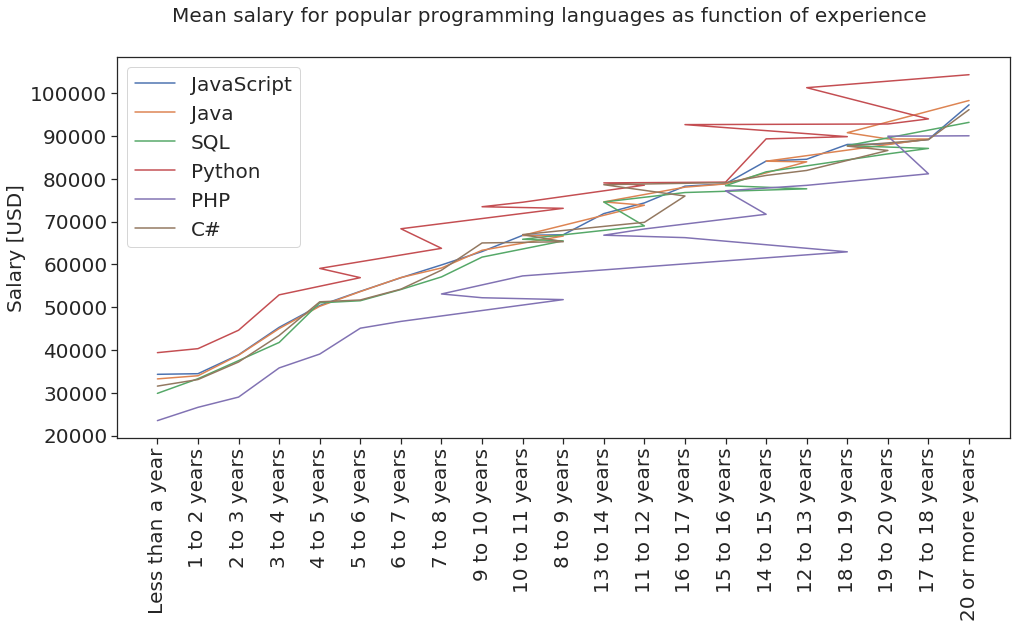

In [8]:
results_experience_available = results_public.dropna(subset=['YearsCodedJob'])
results_experience_and_language_available = results_experience_available.dropna(subset=['HaveWorkedLanguage'])
results_experience_language_and_salary_available = results_experience_and_language_available.dropna(subset=['Salary'])
results_experience_available['YearsCodedJob'].unique()
results_experience_available['HaveWorkedLanguage'].str.contains('JavaScript')
language_list = ["JavaScript", "Java", "SQL", "Python", "PHP", "C#"]

create_salary_chart_for_language(language_list, results_experience_language_and_salary_available)

## Evaluate the Results
Looking at the graph above, we can confirm that salary is correlated with experience. It is only correlated since the relation is not entirely linear. As we can see, some programmers with less experience have a higher salary than some more experienced colleagues. This can be due to new emerging frameworks and tools based on a particular language which are more in demand in the year 2017 and which younger developers are more familiar with. Assuming this is the case, it is understandable that trendy frameworks offer a high salary for less experienced developers if there is a shortage of people with those skills.

# Question 3: What is the most popular occupation for the respondents?

## Business Understanding
When it comes to the software industry, it is important to know not only which programming languages are trneding but also the types of occupations. By knowing this, we can understand the type of projects being developed globally.

## Data Understanding
The survey results include a column called *DeveloperType*. The possible answers to this question came from a fixed list of categories. We may use this colum to know the occupation of the respondents.

## Prepare Data
We can define a function in which we give the general dataframe of the survey results and it generates a bar chart with the most popoular occupations.

In [9]:
def plot_popular_occupations(results_public):
    """Plot bar plot with the most popular developer types"""
    font_size = 20
    results_developer_type_available = results_public.dropna(subset=['DeveloperType'])
    results_developer_type_available['DeveloperType']
    developer_type = results_developer_type_available['DeveloperType'].str.split('; ', expand=True).stack().value_counts()
    plt.figure(figsize=(16,7))
    plt.ylabel('Number of respondents', fontsize=font_size)
    plt.title('Developer type declared', fontsize=font_size)
    developer_type.plot(kind="bar", fontsize=font_size)
    plt.savefig('resources/developer_types' + '.png', bbox_inches='tight')

## Data Modeling
We may use the functino above to get the desired plot.

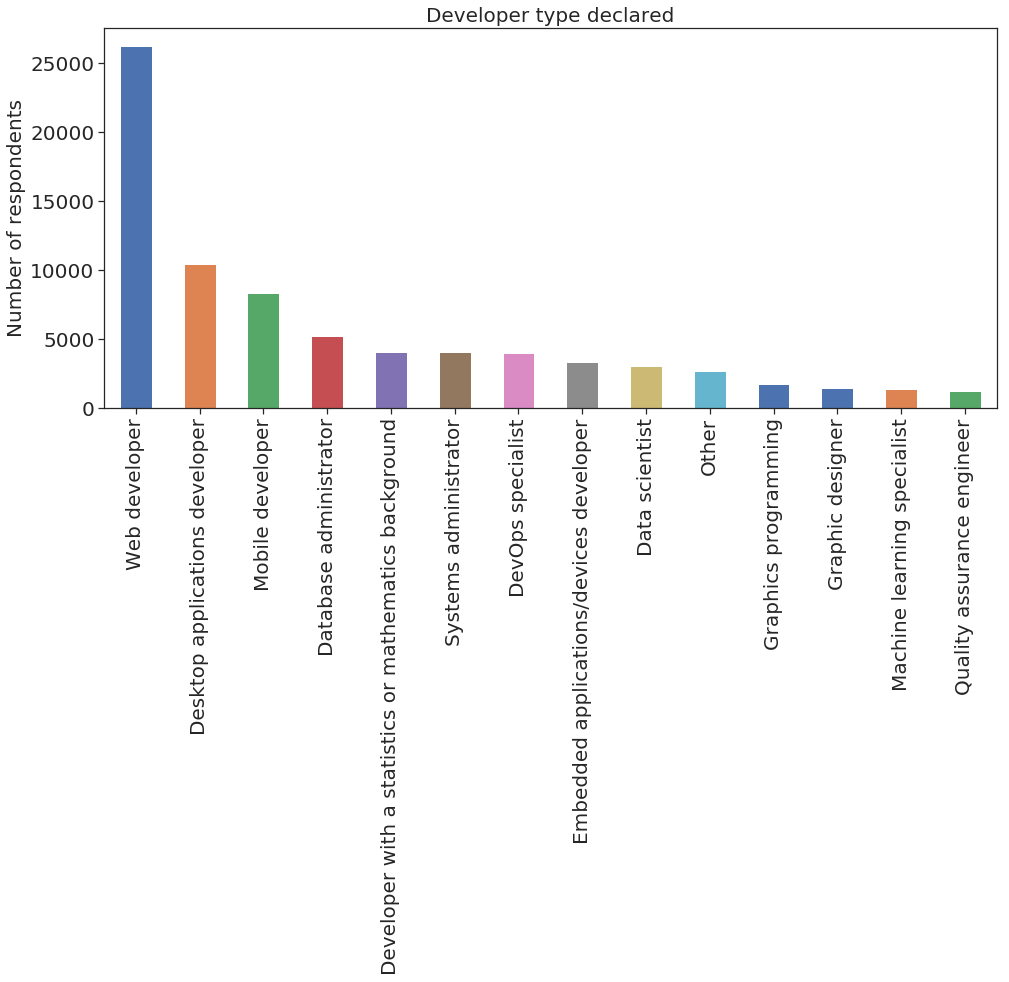

In [10]:
plot_popular_occupations(results_public)

## Evaluate the Results
By far, web developer is the most common occupation in the survey. Surprisignly, desktop application developers won the second place while mobile developers got the third place. The fact that web developer is the most common occupation makes sense considering that JavaScript was the most popular programming language as seen in the resutls of question one.

An additional observation is that there are more database administrators than system administrators. This could be correlated with the popularity of SQL in the previous question.


An important remark here is data scientist. Despite being a new area, there are more respondents with this occupation than other older occupations such as graphics programming, grafic designer and quality assurance. Machine learning specialist is not so common in this survey. However, it is very probable that this will change in the next years.